In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar  9 02:39 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


In [3]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

In [4]:
!ls -l

total 20
drwx------ 5 root root 4096 Apr 11 10:55 drive
drwxr-xr-x 1 root root 4096 Apr  7 13:36 sample_data
drwxr-xr-x 4 root root 4096 Apr 11 10:55 test
drwxr-xr-x 4 root root 4096 Apr 11 10:55 train
drwxr-xr-x 4 root root 4096 Apr 11 10:55 validation


In [5]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

# ImageDataGenerator

In [8]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=200, class_mode='binary')
valid_generator = datagen.flow_from_directory(valid_dir, target_size=(150,150), batch_size=200, class_mode='binary')
test_generator = datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=200, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

## fine_tuning layer 변경

In [11]:
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [19]:
from keras import models, layers, optimizers 

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.000005), metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [20]:
%%time
Hist = model.fit(train_generator, steps_per_epoch=10, epochs=100, validation_data=valid_generator, validation_steps=5)

Epoch 1/100
10/10 [==============================] - 56s 1s/step - loss: 0.8088 - accuracy: 0.5067 - val_loss: 0.6901 - val_accuracy: 0.5490
Epoch 2/100
10/10 [==============================] - 11s 1s/step - loss: 0.7248 - accuracy: 0.5344 - val_loss: 0.6397 - val_accuracy: 0.6490
Epoch 3/100
10/10 [==============================] - 11s 1s/step - loss: 0.6682 - accuracy: 0.6081 - val_loss: 0.5912 - val_accuracy: 0.7440
Epoch 4/100
10/10 [==============================] - 11s 1s/step - loss: 0.6013 - accuracy: 0.6753 - val_loss: 0.5449 - val_accuracy: 0.7850
Epoch 5/100
10/10 [==============================] - 11s 1s/step - loss: 0.5546 - accuracy: 0.7307 - val_loss: 0.4981 - val_accuracy: 0.8110
Epoch 6/100
10/10 [==============================] - 11s 1s/step - loss: 0.4960 - accuracy: 0.7769 - val_loss: 0.4537 - val_accuracy: 0.8360
Epoch 7/100
10/10 [==============================] - 11s 1s/step - loss: 0.4599 - accuracy: 0.7860 - val_loss: 0.4114 - val_accuracy: 0.8500
Epoch 8/100
1

In [21]:
import matplotlib.pyplot as plt
epochs = range(1, len(Hist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

NameError: ignored

In [22]:
loss, accuracy = model.evaluate(test_generator, steps=5)
loss, accuracy

5/5 [==============================] - 4s 636ms/step - loss: 0.2553 - accuracy: 0.9220


(0.2553113102912903, 0.921999990940094)

## fine_tuning layer 변경

In [23]:
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv3':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

conv_base.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [28]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.000005), metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 4,457,473
Non-trainable params: 12,354,880
_________________________________________________________________


In [29]:
%%time

Hist = model.fit(train_generator, steps_per_epoch=10, epochs=100, validation_data=valid_generator, validation_steps=5)

Epoch 1/100
10/10 [==============================] - 12s 1s/step - loss: 0.7029 - accuracy: 0.6264 - val_loss: 0.4271 - val_accuracy: 0.8340
Epoch 2/100
10/10 [==============================] - 10s 1s/step - loss: 0.5515 - accuracy: 0.7251 - val_loss: 0.3293 - val_accuracy: 0.8900
Epoch 3/100
10/10 [==============================] - 10s 1s/step - loss: 0.3683 - accuracy: 0.8305 - val_loss: 0.2774 - val_accuracy: 0.9050
Epoch 4/100
10/10 [==============================] - 10s 1s/step - loss: 0.2940 - accuracy: 0.8741 - val_loss: 0.2477 - val_accuracy: 0.9140
Epoch 5/100
10/10 [==============================] - 10s 1s/step - loss: 0.2440 - accuracy: 0.9014 - val_loss: 0.2297 - val_accuracy: 0.9180
Epoch 6/100
10/10 [==============================] - 10s 1s/step - loss: 0.2030 - accuracy: 0.9292 - val_loss: 0.2179 - val_accuracy: 0.9180
Epoch 7/100
10/10 [==============================] - 10s 1s/step - loss: 0.1901 - accuracy: 0.9337 - val_loss: 0.2092 - val_accuracy: 0.9180
Epoch 8/100
1

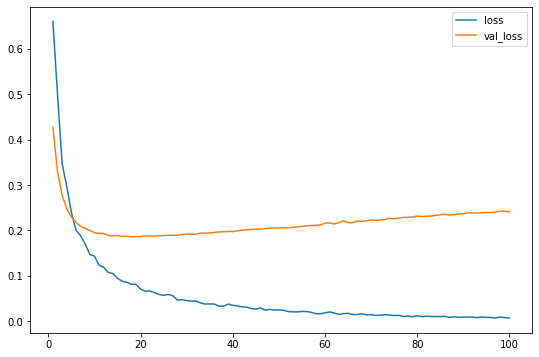

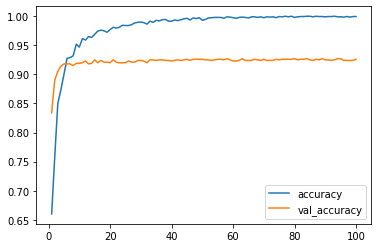

In [31]:
import matplotlib.pyplot as plt
epochs = range(1, len(Hist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [32]:
loss, accuracy = model.evaluate(test_generator, steps=5)
loss, accuracy

5/5 [==============================] - 3s 610ms/step - loss: 0.2550 - accuracy: 0.9200


(0.25499117374420166, 0.9200000166893005)

# batch_size up = 500

In [33]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=500, class_mode='binary')
valid_generator = datagen.flow_from_directory(valid_dir, target_size=(150,150), batch_size=500, class_mode='binary')
test_generator = datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=500, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable= True
  else:
    layer.trainable = False

from keras import models, layers, optimizers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr = 0.000005), metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [40]:
%%time

Hist = model.fit(train_generator, steps_per_epoch=4, epochs=50, validation_data=valid_generator, validation_steps=2)

Epoch 1/50
4/4 [==============================] - 13s 3s/step - loss: 0.2892 - accuracy: 0.8830 - val_loss: 0.2719 - val_accuracy: 0.8970
Epoch 2/50
4/4 [==============================] - 12s 3s/step - loss: 0.2689 - accuracy: 0.8945 - val_loss: 0.2649 - val_accuracy: 0.9040
Epoch 3/50
4/4 [==============================] - 12s 3s/step - loss: 0.2599 - accuracy: 0.9010 - val_loss: 0.2572 - val_accuracy: 0.9050
Epoch 4/50
4/4 [==============================] - 12s 3s/step - loss: 0.2472 - accuracy: 0.9045 - val_loss: 0.2509 - val_accuracy: 0.9040
Epoch 5/50
4/4 [==============================] - 12s 3s/step - loss: 0.2461 - accuracy: 0.8965 - val_loss: 0.2460 - val_accuracy: 0.9080
Epoch 6/50
4/4 [==============================] - 11s 3s/step - loss: 0.2300 - accuracy: 0.9095 - val_loss: 0.2407 - val_accuracy: 0.9090
Epoch 7/50
4/4 [==============================] - 11s 3s/step - loss: 0.2306 - accuracy: 0.9060 - val_loss: 0.2363 - val_accuracy: 0.9100
Epoch 8/50
4/4 [==================

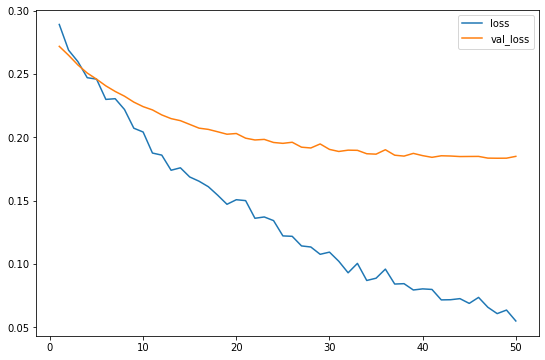

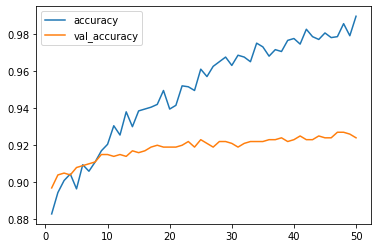

In [41]:
import matplotlib.pyplot as plt
epochs = range(1, len(Hist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [42]:
loss, accuracy = model.evaluate(test_generator, steps=2)
loss, accuracy

2/2 [==============================] - 4s 2s/step - loss: 0.1935 - accuracy: 0.9130


(0.19351553916931152, 0.9129999876022339)

# all trainable

In [48]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=200, class_mode='binary')
valid_generator = datagen.flow_from_directory(valid_dir, target_size=(150,150), batch_size=200, class_mode='binary')
test_generator = datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=200, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [49]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.000005), metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_10 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [50]:
%%time
Hist = model.fit(train_generator, steps_per_epoch=10, epochs=50, validation_data=valid_generator, validation_steps=5)

Epoch 1/50
10/10 [==============================] - 31s 2s/step - loss: 0.7779 - accuracy: 0.5378 - val_loss: 0.6155 - val_accuracy: 0.7020
Epoch 2/50
10/10 [==============================] - 19s 2s/step - loss: 0.6748 - accuracy: 0.5940 - val_loss: 0.5499 - val_accuracy: 0.7930
Epoch 3/50
10/10 [==============================] - 18s 2s/step - loss: 0.5871 - accuracy: 0.6786 - val_loss: 0.4740 - val_accuracy: 0.8130
Epoch 4/50
10/10 [==============================] - 18s 2s/step - loss: 0.5059 - accuracy: 0.7520 - val_loss: 0.4010 - val_accuracy: 0.8600
Epoch 5/50
10/10 [==============================] - 19s 2s/step - loss: 0.4229 - accuracy: 0.8146 - val_loss: 0.3243 - val_accuracy: 0.8840
Epoch 6/50
10/10 [==============================] - 19s 2s/step - loss: 0.3309 - accuracy: 0.8631 - val_loss: 0.2710 - val_accuracy: 0.8980
Epoch 7/50
10/10 [==============================] - 19s 2s/step - loss: 0.2680 - accuracy: 0.8860 - val_loss: 0.2352 - val_accuracy: 0.9060
Epoch 8/50
10/10 [==

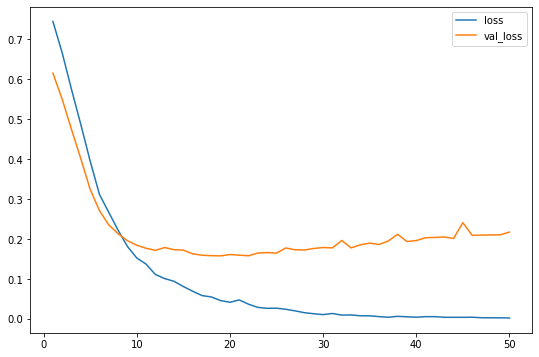

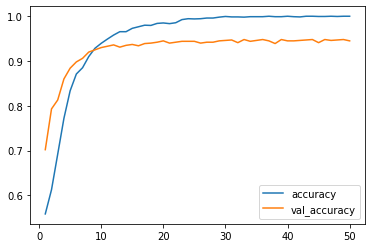

In [51]:
import matplotlib.pyplot as plt
epochs = range(1, len(Hist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [52]:
loss, accuracy = model.evaluate(test_generator, steps=5)
loss, accuracy

5/5 [==============================] - 3s 628ms/step - loss: 0.2073 - accuracy: 0.9460


(0.207289457321167, 0.9459999799728394)